# Initial Setup
This Jupyter Notebook was successfully run in Google Colab, and input images are located in my personal google drive.


### *Note:* 
Using `cv2.imshow` crashes Google Colab and hence Google has provided the users with an alternative `google.colab.patches.cv2_imshow` to do the same function. Although `google.colab.patches.cv2_imshow` doesn't allow to resize the window shape unlike `cv2.imshow`, hence throughout this assignment, where the image is too small , we use `matplotlib.pyplot.plt` and use `cmap=greys_r` to display a bigger version of the same image, that otherwise will be too small while displayed using `cv2_imshow`.

Mounting Google Drive for input images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary Libraries and assigning paths of the required input images.

In [0]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from numpy.linalg import norm
import seaborn as sb
from sklearn.decomposition import PCA
from numpy import linalg as LA

path='drive/My Drive/computer_vision/'
img_path=path+'lenna (1).png'
part_img_path=path+'lenna_part.png'
bimod_path=path+'bimodal_orig.jpg'
rf_path=path+'rock-fish.png'
part_rf_path=path+'part_rock_fish.png'


---

# 1. Histogram


a. Read a RGB colour image (e.g. png) and display it.

############### 1a ################ 



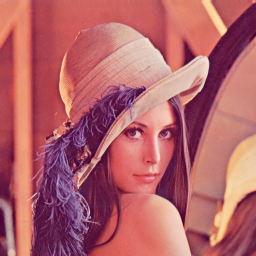

In [3]:
################# 1a ################
print('############### 1a ################ \n')
img=cv.imread(img_path)
cv2_imshow(img)

b. Convert the RGB image into Lab colour system and display each component (L,a,b) as an
grey level image (See section 2.7.4 in
http://www.ee.columbia.edu/ln/dvmm/publications/PhD_theses/jrsmith-thesis.pdf).

############### 1b ################ 

Displaying 'L' component of (L,a,b) as grey level image


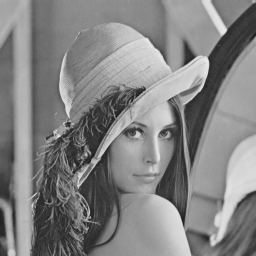

Displaying 'a' component of (L,a,b) as grey level image


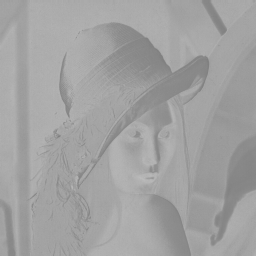

Displaying 'b' component of (L,a,b) as grey level image


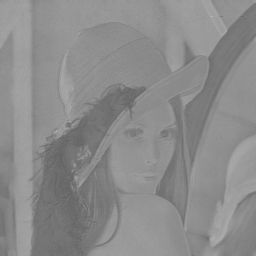

In [4]:
################# 1b ################
img
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
print('############### 1b ################ \n')
print('Displaying \'L\' component of (L,a,b) as grey level image')
L=lab[:,:,0]
cv2_imshow(L)
print('Displaying \'a\' component of (L,a,b) as grey level image')
a=lab[:,:,1]
cv2_imshow(a)
print('Displaying \'b\' component of (L,a,b) as grey level image')
b=lab[:,:,2]
cv2_imshow(b)

c. Compute the spatial derivatives of the luminance component L in the horizontal and vertical direction using convolution by the derivatives of Gaussian filter. Display each these derivatives as grey level images.



> Assigning Filter Values of Gaussian, Derivate (according to the slides) and Sobel Filters (which are derivative approximates)



In [0]:
from scipy.ndimage.filters import gaussian_filter1d
Hy=[[0,0,0],[1,1,1],[-1,-1,-1]]
Hx=[[0,1,-1],[0,1,-1],[0,1,-1]]
gfil=[[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]]

sobx=[[-1,0,1],[-2,0,2],[-1,0,1]]
soby=[[-1,-2,-1],[0,0,0],[1,2,1]]



> Convolving the 'L' component of the input image with filters appropriately. First Applying the gaussian filter for smoothing, then applying both sobel filters and derivatives, seperately to gaussian output.


In [0]:
check=np.convolve(np.ndarray.flatten(np.array(gfil)),np.ndarray.flatten(np.array(L)))
check=check[3:65539]

check1=np.convolve(np.ndarray.flatten(np.array(Hx)),np.ndarray.flatten(np.array(check)))
check2=np.convolve(np.ndarray.flatten(np.array(Hy)),np.ndarray.flatten(np.array(check)))

check3=np.convolve(np.ndarray.flatten(np.array(sobx)),np.ndarray.flatten(np.array(check)))
check4=np.convolve(np.ndarray.flatten(np.array(soby)),np.ndarray.flatten(np.array(check)))


check1=check1[3:65539]
check2=check2[3:65539]
check3=check3[3:65539]
check4=check4[3:65539]


check=np.reshape(check,[256,256])

check1=np.reshape(check1,[256,256])
check2=np.reshape(check2,[256,256])
check3=np.reshape(check3,[256,256])
check4=np.reshape(check4,[256,256])



> Displaying both Horizontal and Vertical Components for both Gaussian+Derivative output and Gaussian+Sobel output.



Gaussian + Derivative Filters on 'L' Component 

Horizontal Component


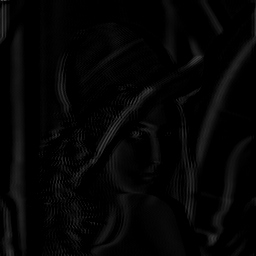

Vertical Component


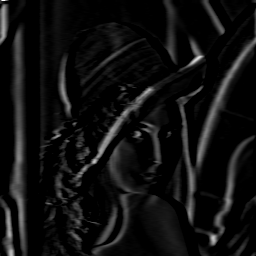

########################
Sobel Filter (Derivatives Approximates) after applying Gaussian Filter on 'L' Component 

Horizontal Component


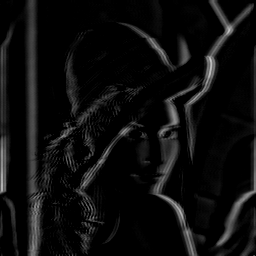

Vertical Component


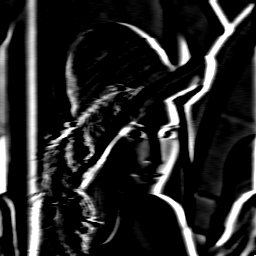

In [7]:

# cv2_imshow(L)
# cv2_imshow(check)

print("Gaussian + Derivative Filters on 'L' Component \n")
print("Horizontal Component")
cv2_imshow(check1)
print("Vertical Component")
cv2_imshow(check2)
print ("########################")
print("Sobel Filter (Derivatives Approximates) after applying Gaussian Filter on 'L' Component \n")
print("Horizontal Component")
cv2_imshow(check3)
print("Vertical Component")
cv2_imshow(check4)

# final_check=check1+check2
# cv2_imshow(final_check)

d. Compute a 2D histogram with the chrominance component (a,b) and display the
histogram as a grey image (heat map) and/or as a 3D surface (bar plot).

############### 1d ################ 



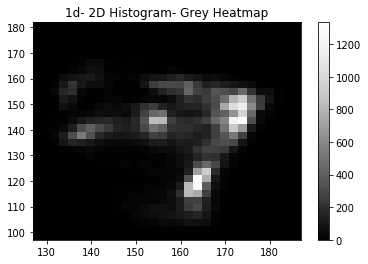

In [8]:
################ 1d ################
print('############### 1d ################ \n')

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import hist2d
x=np.ndarray.flatten(np.array(a))
y=np.ndarray.flatten(np.array(b))
plt.hist2d(x,y,bins=30,cmap='Greys_r')
plt.title("1d- 2D Histogram- Grey Heatmap")
plt.colorbar()




d. Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target
image (i.e. see BP1 section 5.3 in http://www.ee.columbia.edu/dvmm/publications/PhD_theses/jrsmith-thesis.pdf ).



> Both the Target Image and Region of Interest (ROI) are loaded. Then Histogram is computed for ROI's chrominance component (a,b). After Normalising, backprojection is applied using the function `cv.calcBackProject`, and after convolving, we use `cv.threshold` to obtain threshold with which we `AND` it with target image to get the backprojected image.






############### 1e ################ 

Target Image


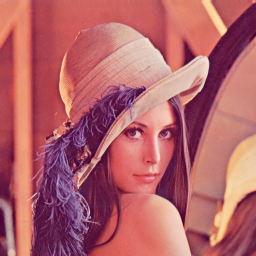

Region of Interest (Taken a part of her arm)


Threshold


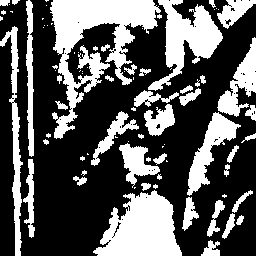

Back Projected Image


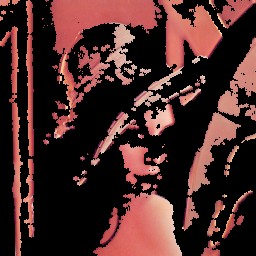

In [9]:
################ 1e ################
print('############### 1e ################ \n')
roi = cv.imread(part_img_path)
lab_bp = cv.cvtColor(roi,cv.COLOR_BGR2LAB)
target = cv.imread(img_path)
labt_bp = cv.cvtColor(target,cv.COLOR_BGR2LAB)

# calculating object histogram
roihist = cv.calcHist([lab_bp],[1,2], None, [256, 256], [0, 256, 0, 256] )
# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([labt_bp],[1,2],roihist,[0,256,0,256],1)

# Now convolute
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
# threshold and binary 'AND'
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)

print("Target Image")
cv2_imshow(target)
print("Region of Interest (Taken a part of her arm)")
cv2_imshow(roi)
print("Threshold")
cv2_imshow(thresh)
print("Back Projected Image")
cv2_imshow(res)

f. Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast (e.g. https://en.wikipedia.org/wiki/Histogram_equalization)



> We use the Luminance ('L') component computed in 1.a and use `cv.equalizeHist` to perform histogram equalisation resulting in an image with enhanced contrast. Also both the histograms are visualised to compare.



################ 1f ################ 

Displaying 'L' component of (L,a,b)


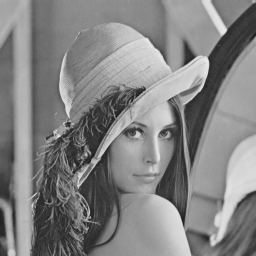

Displaying enhanced (Histogram Equalisation) 'L' component of (L,a,b)


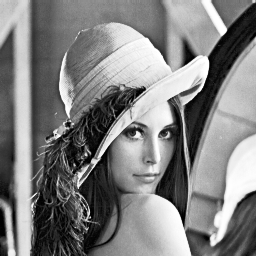

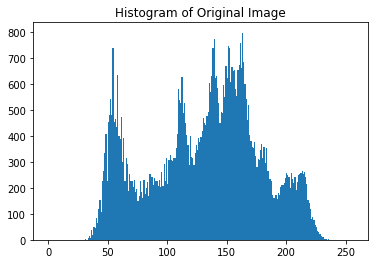

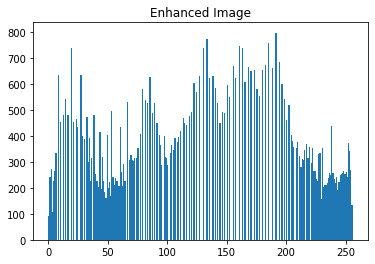

In [10]:
################ 1f ################
print("################ 1f ################ \n")
print('Displaying \'L\' component of (L,a,b)')
cv2_imshow(L)
print('Displaying enhanced (Histogram Equalisation) \'L\' component of (L,a,b)')
L_enhanced = cv.equalizeHist(L)
cv2_imshow(L_enhanced)
print('\n')
plt.title('Histogram of Original Image')
plt.hist(L.flatten(),256,[0,256]); plt.show()
plt.title('Enhanced Image')
plt.hist(L_enhanced.flatten(),256,[0,256]); plt.show()

g. Evaluate the performance of these techniques with histograms (i.e. illustrate when it
works, and when it does not work).

################ 1g ################ 

Original Image


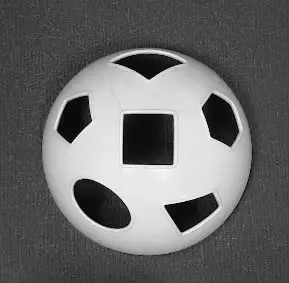


 Displaying Enhanced (Histogram Equalisation)


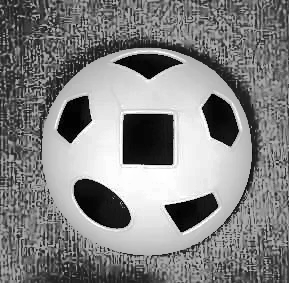

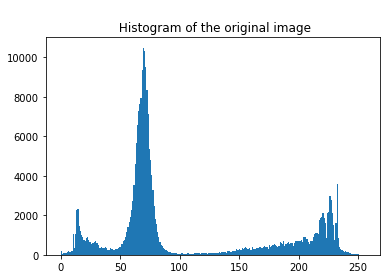

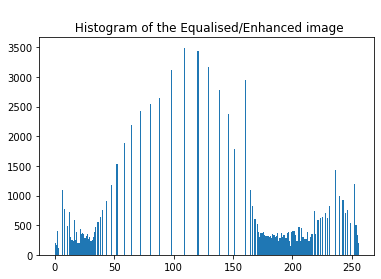

In [11]:
################ 1g ################

##### Where Histogram Equalisation Fails #####
print("################ 1g ################ \n")
bimod_img=cv.imread(bimod_path)
print("Original Image")
cv2_imshow(bimod_img)
bimod_lab=cv.cvtColor(bimod_img,cv.COLOR_BGR2LAB)
bimod_L_enhanced = cv.equalizeHist(bimod_lab[:,:,0])
print("\n Displaying Enhanced (Histogram Equalisation)")
cv2_imshow(bimod_L_enhanced)

plt.title("\n Histogram of the original image")
plt.hist(bimod_img.flatten(),256,[0,256]); plt.show()
plt.title("\n Histogram of the Equalised/Enhanced image")
plt.hist(bimod_L_enhanced.flatten(),256,[0,256]); plt.show()

> Why the above case for histogram equalisation fails?


> It is because this type of distribution is known as Bimodal Distribution where we see there are two major peaks and the remaining distribution is uneven. It is increasing the contrast of background noise, while decreasing the usable signal. This can be seen on the histograms as well.

##### Where Back Projection Fails #####
Target Image


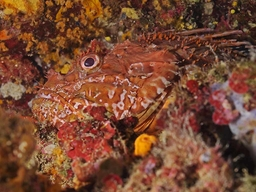

Region of Interest (Taken a part of the Rock_Fish's body)


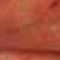

Threshold


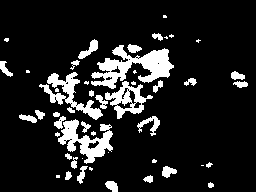

Back Projected Image


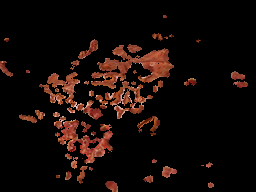

In [12]:
################ 1g ################

##### Where Back Projection Fails #####
print("##### Where Back Projection Fails #####")
roi = cv.imread(part_rf_path)
lab_bp = cv.cvtColor(roi,cv.COLOR_BGR2LAB)
target = cv.imread(rf_path)
labt_bp = cv.cvtColor(target,cv.COLOR_BGR2LAB)

# calculating object histogram
roihist = cv.calcHist([lab_bp],[1,2], None, [256, 256], [0, 256, 0, 256] )
# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([labt_bp],[1,2],roihist,[0,256,0,256],1)

# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)

print("Target Image")
cv2_imshow(target)
print("Region of Interest (Taken a part of the Rock_Fish's body)")
cv2_imshow(roi)
print("Threshold")
cv2_imshow(thresh)
print("Back Projected Image")
cv2_imshow(res)



> Why the above case for backprojection fails?

> It is because we see the presence of different colors in the same image and when the subject isn't very different in distribution from its background, we see back projection fail. As a reson of that we see that the Rock-Fish that is visible in the original image isn't segmented accurately through back projection.


---





# 2. PCA

a. Compute the mean image and principal components for a set of images (e.g. use the
training images of ‘5’ in the mnist dataset). Display the mean image and the first 2
principal components (associated with the highest eigenvalues).



> The MNIST dataset is initially loaded from Tensorflow library. The indices of digit '5' are then recorded. Iterating through the indices, we sum the images of digit '5' and then take the mean.



################ 2a ################ 



Using TensorFlow backend.


Mean of all images of digit '5'


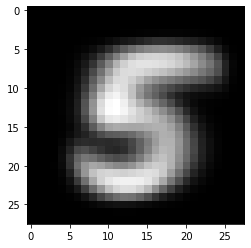

In [13]:
################ 2a ################
print("################ 2a ################ \n")

##### Importing MNIST Dataset from TensorFlow
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##### Taking incides of all the digit '5'
indices_5={}
for i in range(0,len(y_train)):
  if(y_train[i]==5):
    indices_5[i]=1

##### Finding the mean of 'n' images of digit '5'
sum_img=np.zeros(shape=(28,28))
for i in indices_5.keys():
  sum_img=np.add(sum_img,x_train[i])
mean_img=sum_img/len(indices_5)
print('Mean of all images of digit \'5\'')
from matplotlib import pyplot
pyplot.imshow(mean_img,cmap='Greys_r')




> Indented block



In [0]:
x_train=np.reshape(x_train,(60000,784))
x_test=np.reshape(x_test,(10000,784))

all5=[]
for i in indices_5.keys():
  all5.append(x_train[i])
set_of_images=np.array(all5)

Prinicipal Component 1


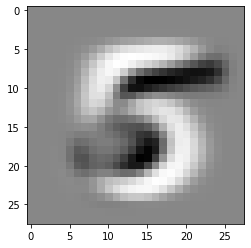


Principal Component 2


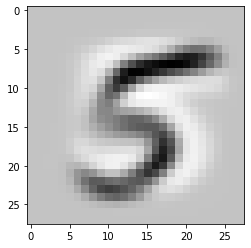

In [15]:
pca = PCA(n_components=784)
pca.fit(set_of_images)
# print(pca.components_)
# print(pca.explained_variance_)
np.shape(pca.components_)
print("Prinicipal Component 1")
pyplot.imshow(np.reshape(pca.components_[0],(28,28)),cmap='Greys_r')
pyplot.show()
print("\nPrincipal Component 2")
pyplot.imshow(np.reshape(pca.components_[1],(28,28)),cmap='Greys_r')
pyplot.show()

b. Compute and display the reconstructions of a test image using the mean image and with
p principal components associated with the p highest eigenvalues (e.g. Fig 10.12) with
p=10 and p=50.



> We start with creating a centred data matrix `centre_set` by subtracting mean vector `mean_vec` from all image vectors. Then we create a covariance matrix, using which we compute the eigen values and eigen vectors.



In [0]:
mean_vec=np.reshape(mean_img,(1,784))
centre_set=np.reshape(set_of_images,(max(np.shape(set_of_images)),784))-mean_vec
cov_mat=np.matmul(np.transpose(centre_set),centre_set)
eig_vals,eig_vecs=LA.eig(cov_mat)



> Here we create a function for reconstruction. To create an image reconstruction from `p` principal components, we first use `p` eigen vectors and create PCA Projections `Z` of size (n,`p`) where n is total number of images in the centred set. We map the projections back to tranpose of eigenvectors to reconstruct and add the mean of the image to get a reconstruction.

> Although the question asks for p=10 and p=50, I've reconstructed for p=10, 50, 200, 450, 784 and also displayed all of them with the original image, to compare and come at a conclusion on how increasing the Prinicipal Components makes the image closer to the original image.






Reconstructed Image using 10 Prinicipal Components


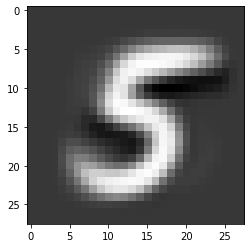


Reconstructed Image using 50 Prinicipal Components


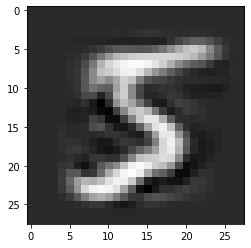


Reconstructed Image using 200 Prinicipal Components


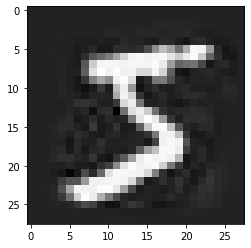


Reconstructed Image using 450 Prinicipal Components


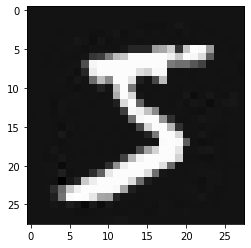


Reconstructed Image using 784 Prinicipal Components


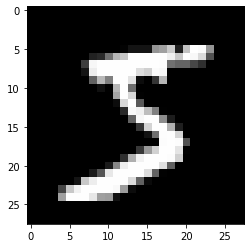

Original Image of first '5'


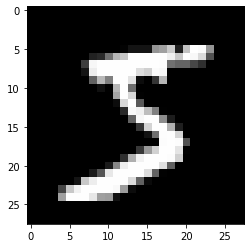

In [17]:
#Function for Reconstruction of Image from given 'p' principal components
def recon(p):
  print("\nReconstructed Image using %d Prinicipal Components"%p)
  V=eig_vecs[:,:p]
  V_tran=np.transpose(V)
  Z=np.matmul(centre_set,V)
  X_hat=np.matmul(Z,V_tran)
  X_h=X_hat+mean_vec
  pyplot.imshow(np.reshape(np.real(X_h[0]),(28,28)),cmap='Greys_r')
  pyplot.show()

#10 PCA Components
recon(10)

#50 PCA Components
recon(50)

#200 PCA Components
recon(200)

#450 PCA Components
recon(450)

#784 PCA Components
recon(784)

print("Original Image of first \'5\'")
pyplot.imshow(np.reshape(x_train[0],(28,28)),cmap='Greys_r')
pyplot.show()

c. Read https://doi.org/10.1109/34.598227 ‘Probabilistic visual learning for object
representation’ (PAMI1997). Compute and display a DFFS (distance-from feature-space) and SSD (sum-of-square-differences) heat maps for detection using your PCA representation of a MNIST number. For the test image, use a composite image made of
MNIST test images.



> To begin with we try to reconstruct the composite image made of MNIST test images. We use 7 rows, with each rows containing one occurence of all the digit in ascending order.


> We get around 2000 indices of digits in the MNIST datasets and classify them as which digit they're. We then take 7 instances of each digit, since we need to make 7 rows. Later we stack them horizontally using `numpy.hstack` to create 7 individual rows, after which we stack the 7 rows vertically using `numpy.vstack` to create the test image.




################ 2c ################ 

Constructed Test Image for computing SSD and DFFS Heat Maps


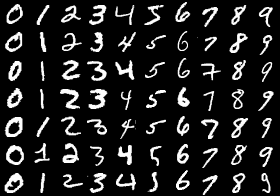

In [18]:
################ 2c ################
print("################ 2c ################ \n")

indices_0=[]
indices_1=[]
indices_2=[]
indices_3=[]
indices_4=[]
indices_5=[]
indices_6=[]
indices_7=[]
indices_8=[]
indices_9=[]

#Taking 2000 images and getting their indices.
for i in range(2000):
  if(y_train[i]==0):
    indices_0.append(i)
  if(y_train[i]==1):
    indices_1.append(i)
  if(y_train[i]==2):
    indices_2.append(i)
  if(y_train[i]==3):
    indices_3.append(i)
  if(y_train[i]==4):
    indices_4.append(i)
  if(y_train[i]==5):
    indices_5.append(i)
  if(y_train[i]==6):
    indices_6.append(i)
  if(y_train[i]==7):
    indices_7.append(i)
  if(y_train[i]==8):
    indices_8.append(i)
  if(y_train[i]==9):
    indices_9.append(i)

#Taking the first 7 indices of each digit
bb=0
ee=bb+7
indices_0=indices_0[bb:ee]
indices_1=indices_1[bb:ee]
indices_2=indices_2[bb:ee]
indices_3=indices_3[bb:ee]
indices_4=indices_4[bb:ee]
indices_5=indices_5[bb:ee]
indices_6=indices_6[bb:ee]
indices_7=indices_7[bb:ee]
indices_8=indices_8[bb:ee]
indices_9=indices_9[bb:ee]

##### Importing MNIST Dataset from TensorFlow again to have them 28x28 defualt.
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Function to Stack Images to Horizontally.
def hstacker(i):
  img=np.hstack((x_train[indices_0[i]],
                         x_train[indices_1[i]],
                         x_train[indices_2[i]],
                         x_train[indices_3[i]],
                         x_train[indices_4[i]],
                         x_train[indices_5[i]],
                         x_train[indices_6[i]],
                         x_train[indices_7[i]],
                         x_train[indices_8[i]],
                         x_train[indices_9[i]]))
  return img

imgg1=hstacker(0)
imgg2=hstacker(1)
imgg3=hstacker(2)
imgg4=hstacker(3)
imgg5=hstacker(4)
imgg6=hstacker(5)
imgg7=hstacker(6)

#Stacking Images Vertically.
final_img=np.vstack((imgg1,imgg2,imgg3,imgg4,imgg5,imgg6,imgg7))

cv.imwrite('final_img.png', final_img)

fin_img_path=path+'final_img.png'
final_img=cv.imread(fin_img_path)
final_img=cv.cvtColor(final_img, cv.COLOR_BGR2LAB)
final_img=final_img[:,:,0]
print('Constructed Test Image for computing SSD and DFFS Heat Maps')
cv2_imshow(final_img)

> SSD is given by the norm of the difference of the test image, `final_img[i:i+28,j:j+28]` (small window sliding through the entire test image) and the mean image, `mean_img`. We use the `numpy.linalg.norm` to calculate the norm of the resulted difference. The heatmap is then visualised using `seaborn.heatmap`.



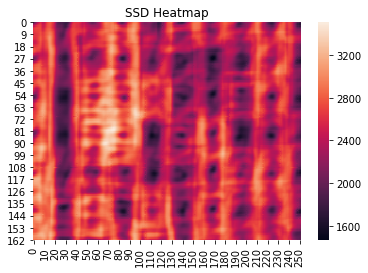

In [19]:
ssd=[]
for i in range(28*6):
  for j in range(28*9):
    y=final_img[i:i+28,j:j+28]
    if(np.shape(y)[0]<28):
      print(i,j)
    if(np.shape(y)[0]==28):
      ssd.append(norm(y-mean_img))

ssd_temp=np.reshape(ssd,(168,252))
ssd_hmap=sb.heatmap(ssd_temp)
plt.title('SSD Heatmap')
plt.show()


> DFFS is given by norm of the error (||ε||) formed during the recontruction of the image. 
> Also,

> SSD= DIFS+DFFS

> We slide through the entire test image, over a window `y` which is given by `final_img[i:i+28,j:j+28]`. We try to reconstruct the image and find the norm of the difference of the original image and the reconstructed image to get the norm of the error. We use the `numpy.linalg.norm` to calculate the norm of the resulted difference. The heatmap is then visualised using `seaborn.heatmap`. 



In [0]:
err=[]

def recon_temp(p,yy):
  V=eig_vecs[:,:p]
  V_tran=np.transpose(V)
  Z=np.dot(yy.flatten()-mean_img.flatten(),V)
  # Z=np.dot(centre_set,V)
  X_hat=np.dot(Z,V_tran)
  X_h=X_hat+mean_vec
  # return np.real(X_h[0])
  err=np.reshape(yy,(784,1))-X_h[0]
  return err

p=10

for i in range(28*6):
  for j in range(28*9):
    y=final_img[i:i+28,j:j+28]
    err_temp=recon_temp(p,y)
    err_temp=norm(err_temp)
    err.append(err_temp)


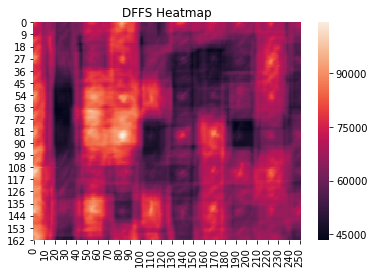

In [21]:
np.shape(err)
err_temp=np.reshape(err,(168,252))
err_hmap=sb.heatmap(err_temp)
plt.title('DFFS Heatmap')
plt.show()

d. Evaluate the performance of SSD and DFFS (i.e. illustrate when it works, and when it does
not work).




> SSD could fail in cases where the distribution is bi-modal and both the representations are completely different of each other. The mean image would not be a representation of either cases and so would the centred set.

> For example: The alphabet set, if contains both upper case (capital) and lower case (small) alphabets, the mean would be an image that is completely non-representative of the actual dataset. Hence when you try to calculate the SSD by subtracting the mean, you would values in heatmap that erroneous.

> Also SSD can be a poor measure when there are a lot of outliers in the dataset, leading to a high value in the heatmap than it actually would be. Those outliers could be, for example, digits poorly written, or digits which are similar in terms of features.

>The addition of DFFS (as mentioned by the referenced research papers) to the projection onto eigenvectors would improve the discrimination as the DFFS contains considerable information. The DIFS is also considerd as the Mahalanobis Distance in the feature space.




---



# References

1. Campilho, Aurélio, and Mohamed Kamel. 2004. Image Analysis and Recognition: International Conference, ICIAR 2004, Porto, Portugal, September 29 - October 1, 2004, Proceedings, Part II. Berlin, Heidelberg: Springer-Verlag Berlin Heidelberg.
2. Radig, Bernd & Florczyk, Stefan. (2001). Pattern Recognition, 23rd DAGM-Symposium, Munich, Germany, September 12-14, 2001, Proceedings. 
3. Heyden, Anders & Sparr, Gunnar & Nielsen, Mads & Johansen, Peter. (2002). Computer vision - ECCV 2002. 7th European conference, Copenhagen, Denmark, May 28–31, 2002. Proceedings. Part 2. 10.1007/3-540-47967-8. 
4. Zha, Hongbin, Rin-ichiro Taniguchi, and Stephen Maybank, eds. 2010. Computer Vision – ACCV 2009. Lecture Notes in Computer Science. Springer Berlin Heidelberg. doi:10.1007/978-3-642-12304-7.
5. https://docs.opencv.org/4.1.2/


---



